# What happens if we modfiy the salary?

First: Create model similar to `exp_regression.ipynb`

In [1]:
# To make realitve imports work
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# actual imports
from src.constants import YEARS
from src.dataLoading import getAllCourses, getTotalStudentsFor, getSallaries, getGraduatesInBwFor, getAllGraduatesYears, getInflationAdjustedBruttoSallary
import numpy as np
from statsmodels.tsa.api import VAR
from src.salaryExpHelpers import plot, modifySalary

In [2]:
courses = getAllCourses() # if you use all options, dont put that in the title down marked  there
courses = ['"Informatik"']
interestingYears = YEARS[3:-4]
totalStudents = getTotalStudentsFor(courses = courses, years = interestingYears)

SECTOR = ('WZ08-62', 'Dienstleistungen der Informationstechnologie')
inflationAdjasutedBruttoSallary = getInflationAdjustedBruttoSallary(SECTOR)
sallaries = getSallaries()
SALLARY_YEARS = sallaries.index.levels[2]

years = getAllGraduatesYears()
years = years[37:52]
graduatesInBW = getGraduatesInBwFor(years = years)

Create cummulative inflation:
2.3 -> 1.023
2.8 -> 1.051644
0.2 -> 1.053747288
1.1 -> 1.065338508168
2.5 -> 1.0919719708722
2.2 -> 1.1159953542313885
1.6 -> 1.1338512798990907
0.8 -> 1.1429220901382835
0.7 -> 1.1509225447692513
0.4 -> 1.1555262349483282
1.7 -> 1.1751701809424497
1.9 -> 1.1974984143803562
1.4 -> 1.2142633921816812
0.4 -> 1.219120445750408
3.2 -> 1.258132300014421

Adjust sallary for inflation:
4211.5 -> 4116.813294232649
4251.0 -> 4155.4252199413495
4302.5 -> 4091.2133763897286
4317.0 -> 4105.001312231135
4349.0 -> 4127.175509276376
4375.0 -> 4151.8493568829945
4428.0 -> 4156.425367195795
4491.5 -> 4216.030834859963
4538.0 -> 4155.784325100693
4593.0 -> 4206.151918287238
4584.0 -> 4107.54398091299
4598.0 -> 4120.0888360030385
4597.0 -> 4054.323597367301
4655.5 -> 4105.9176653346685
4805.0 -> 4204.136083692842
4854.0 -> 4247.008647293455
4927.5 -> 4281.348056300275
5012.5 -> 4355.20185331408
4930.0 -> 4266.4544091640255
4999.0 -> 4326.1674627608445
5064.0 -> 4309.16311707

### Build the model (once again)

In [3]:
PAST_STEPS = 4
PREDICTION_STPES = 2

completeData = np.column_stack((totalStudents, inflationAdjasutedBruttoSallary, graduatesInBW.repeat(2)))
model = VAR(completeData)

results = model.fit(maxlags=PAST_STEPS)

### Forecasting
Modify the salary expectation, to see how the model would react.

#### 10% salary increase

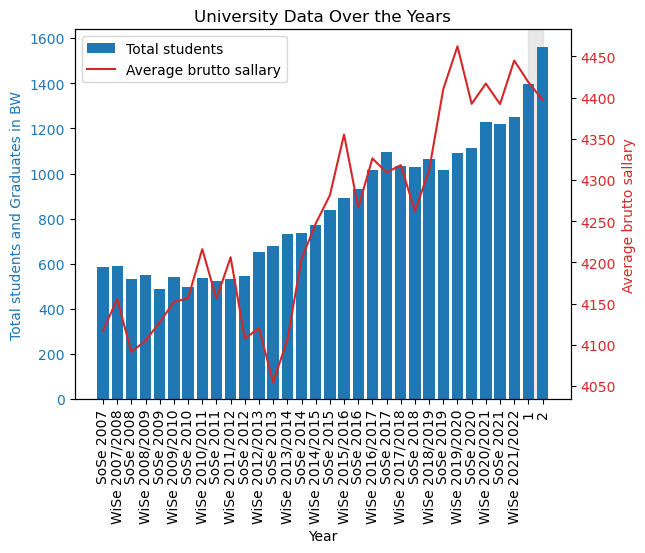

In [4]:
modifiedSalary = modifySalary(completeData, lambda x: x * 1.1)
lagged_values = modifiedSalary[-PAST_STEPS:]  # Use the last available values as lagged values
forecast = results.forecast(lagged_values, steps=PREDICTION_STPES)
plot(completeData, forecast, YEARS[3:-4])

#### 30% salary incrase

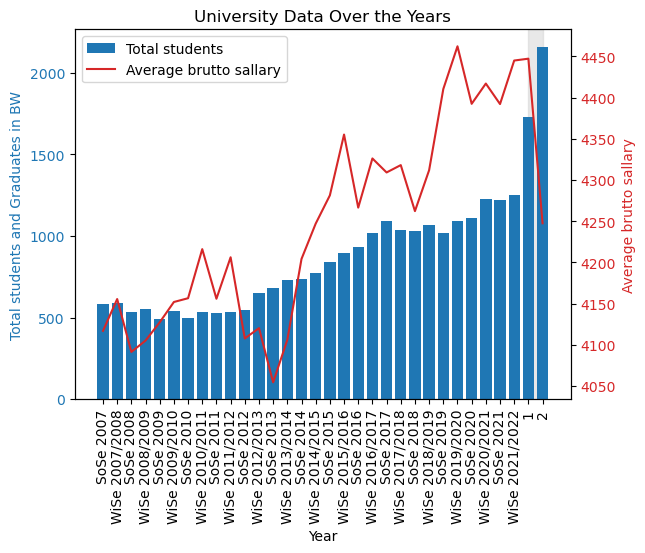

In [5]:
modifiedSalary = modifySalary(completeData, lambda x: x * 1.3)
lagged_values = modifiedSalary[-PAST_STEPS:]  # Use the last available values as lagged values
forecast = results.forecast(lagged_values, steps=PREDICTION_STPES)
plot(completeData, forecast, YEARS[3:-4])

#### 20% salary reduction

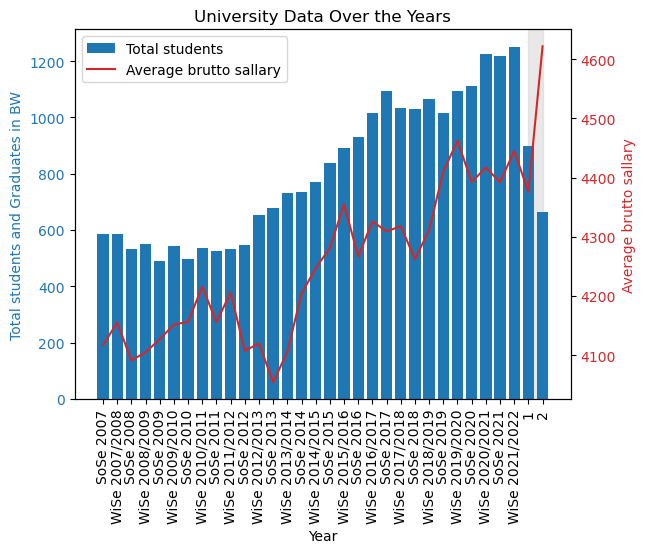

In [6]:
modifiedSalary = modifySalary(completeData, lambda x: x * 0.8)
lagged_values = modifiedSalary[-PAST_STEPS:]  # Use the last available values as lagged values
forecast = results.forecast(lagged_values, steps=PREDICTION_STPES)
plot(completeData, forecast, YEARS[3:-4])